## Imputing Missing Values

### Mean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create dataframe
df = pd.DataFrame()

n = 100

# Make individuals
df['Individual'] = np.random.randint(low=20, high=60, size=n)

# Delete some individual values
df = df.mask(np.random.random(df.shape) < .1)

# Make groups
df['Group'] = np.random.randint(low=1, high=4, size=n)

print(df.head())

   Individual  Group
0        56.0      1
1        40.0      2
2        47.0      1
3        31.0      1
4        33.0      3


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Individual    92 non-null float64
Group         100 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB
None


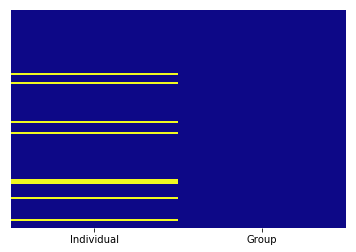

In [4]:
# Visualize missing data with heatmap (hat tip to Jose Portilla)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [5]:
# Provide average based on group of missing numbers
def get_feature_mean(row, feature, index):
    if row.index[index] == feature:
        if np.isnan(row[row.index[index]]):
            return df.loc[df['Group'] == row.Group, feature].mean().round(0)
        else:
            return row[row.index[index]]
        
feature = 'Individual'
df[feature] = df.apply(get_feature_mean, args=(feature, df.columns.get_loc(feature)), axis=1)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Individual    100 non-null float64
Group         100 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB
None


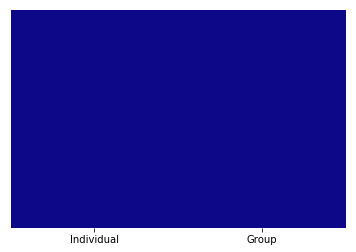

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')